In [7]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import requests
#from lmfit import minimize, Parameters, Parameter, report_fit
import random
import math


In [8]:
#!pip install SALib

In [9]:
from SALib.analyze import sobol
from SALib.sample import saltelli
from SALib.test_functions import Ishigami

In [31]:
import numpy as np
import yaml
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy as copy
from model import Data, ode_objective, ode_solve, euler, eval_grads
import sciris as sc

with open("tb-mbr/paramteres.yml", "r", encoding="utf8") as file:
    p = yaml.safe_load(file)

def output(string: str):
    with open("output.txt", "a") as file:
        file.write(string + "\n")

initial_state = p["initial_state"]
params = p["all_parameters"]

t_start = 2009
modelling_time = 5
t_end = t_start + modelling_time

step = 1/120

n = int(modelling_time/step)

model_kwargs = {
    "init_x": initial_state,
    "t_start": t_start,
    "t_end": t_end,
    "step":step,
} | p["model_kwargs"]

results = ode_solve(params=params, **model_kwargs)

def func(x):
    params['beta']=x[0]
    params['omega']=x[1]
    params['phi_p']=x[2]
    return ode_solve(params=params, **model_kwargs)['Ig'].data

In [32]:
import numpy as np
import matplotlib.pyplot as plt

from SALib import ProblemSpec
sp = ProblemSpec({
    'names': ['beta', 'omega', 'phi_p'],
    'bounds': [[0.001, 0.01]]*3,
})

In [33]:
#x = np.linspace(-1, 1, 100)

# Create wrapper (runs each a, b combination separately)
def wrapped_parabola(ab):
    y = np.zeros((ab.shape[0],int(n+1)))
    for i, (a) in enumerate(ab):
        y[i] = func((a))
    return y

(
    sp.sample_sobol(2**5)
    .evaluate(wrapped_parabola)
    .analyze_sobol(num_resamples=10000)
)

C:\Users\a.neverov\miniconda3\envs\tt\Lib\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
C:\Users\a.neverov\miniconda3\envs\tt\Lib\site-packages\SALib\analyze\sobol.py:141: RuntimeWarning: invalid value encountered in divide
  Y = (Y - Y.mean()) / Y.std()
C:\Users\a.neverov\miniconda3\envs\tt\Lib\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
C:\Users\a.neverov\miniconda3\envs\tt\Lib\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
C:\Users\a.neverov\miniconda3\en

Samples:
	3 parameters: ['beta', 'omega', 'phi_p']
	256 samples
Outputs:
	601 outputs: ['Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17', 'Y18', 'Y19', 'Y20', 'Y21', 'Y22', 'Y23', 'Y24', 'Y25', 'Y26', 'Y27', 'Y28', 'Y29', 'Y30', 'Y31', 'Y32', 'Y33', 'Y34', 'Y35', 'Y36', 'Y37', 'Y38', 'Y39', 'Y40', 'Y41', 'Y42', 'Y43', 'Y44', 'Y45', 'Y46', 'Y47', 'Y48', 'Y49', 'Y50', 'Y51', 'Y52', 'Y53', 'Y54', 'Y55', 'Y56', 'Y57', 'Y58', 'Y59', 'Y60', 'Y61', 'Y62', 'Y63', 'Y64', 'Y65', 'Y66', 'Y67', 'Y68', 'Y69', 'Y70', 'Y71', 'Y72', 'Y73', 'Y74', 'Y75', 'Y76', 'Y77', 'Y78', 'Y79', 'Y80', 'Y81', 'Y82', 'Y83', 'Y84', 'Y85', 'Y86', 'Y87', 'Y88', 'Y89', 'Y90', 'Y91', 'Y92', 'Y93', 'Y94', 'Y95', 'Y96', 'Y97', 'Y98', 'Y99', 'Y100', 'Y101', 'Y102', 'Y103', 'Y104', 'Y105', 'Y106', 'Y107', 'Y108', 'Y109', 'Y110', 'Y111', 'Y112', 'Y113', 'Y114', 'Y115', 'Y116', 'Y117', 'Y118', 'Y119', 'Y120', 'Y121', 'Y122', 'Y123', 'Y124', 'Y125', 'Y126', 'Y127', 'Y12

In [34]:
x = np.linspace(0,modelling_time,n+1)

C:\Users\a.neverov\AppData\Local\Temp\ipykernel_11216\1722424266.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right')


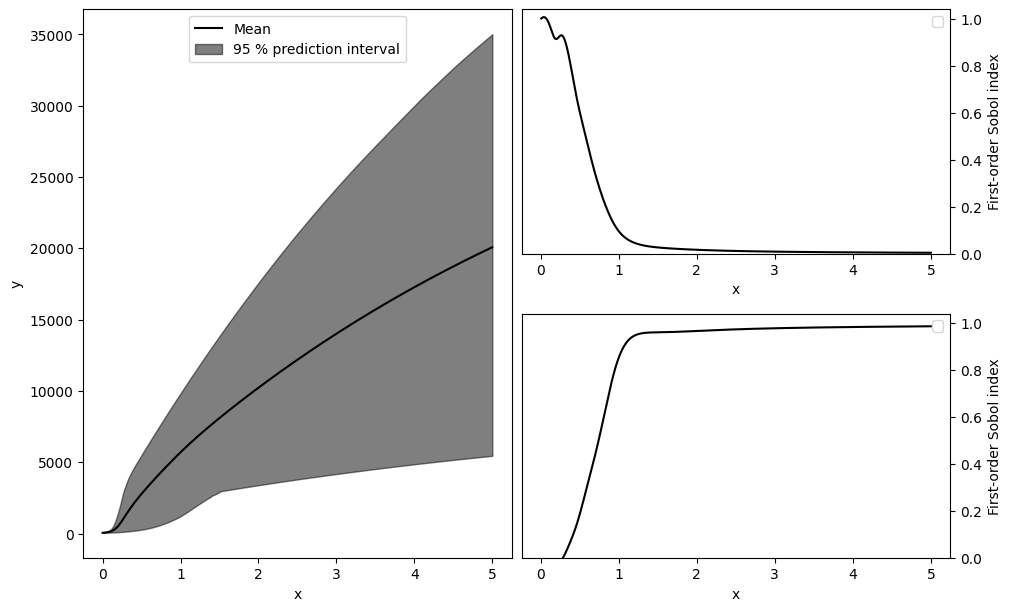

In [35]:
# Get first order sensitivities for all outputs
S1s = np.array([sp.analysis[_y]['S1'] for _y in sp['outputs']])

# Get model outputs
y = sp.results

# Set up figure
fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(2, 2)

ax0 = fig.add_subplot(gs[:, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 1])

# Populate figure subplots
for i, ax in enumerate([ax1, ax2]):
    ax.plot(x, S1s[:, i],
            #label=r'S1$_\mathregular{{{}}}$'.format(problem["names"][i]),
            color='black')
    ax.set_xlabel("x")
    ax.set_ylabel("First-order Sobol index")

    ax.set_ylim(0, 1.04)

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()

    ax.legend(loc='upper right')

ax0.plot(x, np.mean(y, axis=0), label="Mean", color='black')

# in percent
prediction_interval = 95

ax0.fill_between(x,
                 np.percentile(y, 50 - prediction_interval/2., axis=0),
                 np.percentile(y, 50 + prediction_interval/2., axis=0),
                 alpha=0.5, color='black',
                 label=f"{prediction_interval} % prediction interval")

ax0.set_xlabel("x")
ax0.set_ylabel("y")
ax0.legend(#title=r"$y=a+b\cdot x^2$",
           loc='upper center')._legend_box.align = "left"

plt.show()